Saving GirlJPG.jpg to GirlJPG (14).jpg


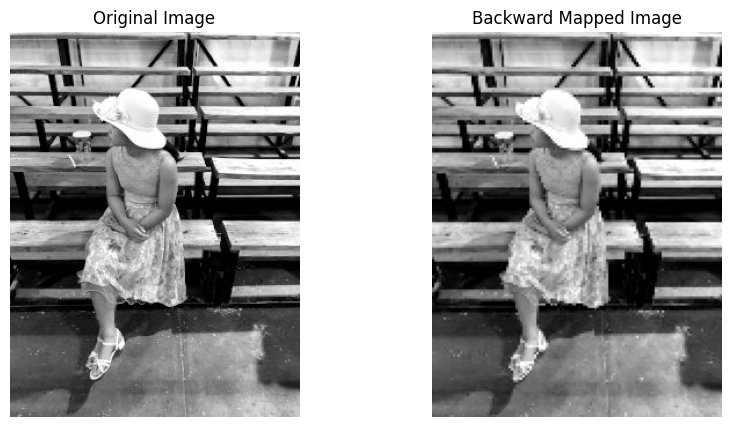

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import os

# Upload an image file
uploaded = files.upload()

# Assuming there's only one image uploaded, get the name of the file
image_filename = next(iter(uploaded))

# Read the image into a numpy array using matplotlib
image = plt.imread(image_filename)

# If the image has an alpha channel, remove it
if image.ndim == 3 and image.shape[2] == 4:
    image = image[:, :, :3]

# Function to interpolate pixel values
def interpolate(image, x, y):
    # Ensure the coordinates are within the image boundaries
    x = np.clip(x, 0, image.shape[1] - 1)
    y = np.clip(y, 0, image.shape[0] - 1)
    # Return the pixel value at the interpolated coordinates
    return image[int(y), int(x)]

# Backward mapping transformation
scale_x, scale_y = 0.5, 0.5  # Example scale factors
height, width = image.shape[:2]
new_height, new_width = int(height * scale_y), int(width * scale_x)

# Check if the image is grayscale or RGB and allocate 'new_image' accordingly
if image.ndim == 2:  # Grayscale image
    new_image = np.zeros((new_height, new_width), dtype=image.dtype)
elif image.ndim == 3:  # RGB image
    new_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

# Perform the backward mapping
for y in range(new_height):
    for x in range(new_width):
        # Calculate the source coordinates
        src_x = x / scale_x
        src_y = y / scale_y
        # Assign the interpolated pixel value to the new image
        new_image[y, x] = interpolate(image, src_x, src_y)

# Display the original and the transformed image side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray' if new_image.ndim == 2 else None)
plt.title('Backward Mapped Image')
plt.axis('off')

plt.show()
